<a href="https://colab.research.google.com/github/UdTatyana/SF-Data-Science/blob/main/EDA-5_HomeWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1RVFa4Lp5TJOOznaboDionr890YRyVgge#scrollTo=iP80-lHplw9i
# Практическое задание

Вам предстоит решить настоящую бизнес-задачу: проанализировать эффективность обоих вариантов посадочной страницы сразу по двум критериям: конверсии покупки и среднему чеку. На основе проведённого анализа необходимо сделать выводы и принять решение: какой из вариантов дизайна более предпочтительный.

Итак, наша фирма предлагает следующие варианты туров и их соответствующие стоимости:

Таиланд — 100 000 рублей;
Турция — 60 000 рублей;
Мальдивы — 200 000 рублей;
Санкт-Петербург — 10 000 рублей;
Камчатка — 150 000 рублей.

In [ ]:
# Прочитаем и изучим данные

import pandas as pd # импорт библиотеки pandas

data = pd.read_csv('/content/ab_data_tourist.csv') # чтение файла
data.head() # вывод первых 5 строк из таблицы

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000


Описание полей:

user_id -	идентификатор пользователя, зашедшего на сайт

date -дата захода

group - группа теста (контрольная — А или тестовая — B)

purchase - признак покупки: совершил ли пользователь покупку тура (1 — да, 0 — нет)

price - цена купленного тура (если покупка не состоялась, цена равна 0)

## Задание 7.1
Начнём с исследования структуры наших данных. С помощью метода info() выведите информацию о типах данных и количестве непустых значений. Какой тип данных имеет столбец date?

In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   294478 non-null  int64 
 1   date      294478 non-null  object
 2   group     294478 non-null  object
 3   purchase  294478 non-null  int64 
 4   price     294478 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 11.2+ MB


Вывод: Признаки user_id, purchase и price - числовые (тип данных int64), признаки date и group - тип object. Пропущенных значений нет.
Столбец date представлен типом данных object

## Задание 7.2
Приведите столбец date к типу данных datetime. Убедитесь в равной длительности проведения тестирования для каждой из групп. Для этого сгруппируйте данные по признаку группы и определите первую и последнюю дату наблюдения для каждой из групп.

В какой промежуток времени проводился A/B-тест?
1. с 2 по 24 января 2021 года
2. с 1 по 24 января 2021 года
3. с 15 декабря 2020 года по 24 января 2021 года
4. с 23 февраля по 8 марта 2017 года


In [ ]:
data['date'] = pd.to_datetime(data['date']) # перевод в формат datetime

grouped = data.groupby('group') # группировка по признаку группы
print('Первая дата наблюдений:', grouped['date'].min()) # вывод первой даты для каждой группы
print('Последняя дата наблюдений:', grouped['date'].max()) # вывод последней даты для каждой группы



Первая дата наблюдений: group
A   2021-01-02
B   2021-01-02
Name: date, dtype: datetime64[ns]
Последняя дата наблюдений: group
A   2021-01-24
B   2021-01-24
Name: date, dtype: datetime64[ns]


Вывод: Первая и последняя даты наблюдений для каждой группы совпадают, значит, длительность проведения для каждой из групп одинакова. Наблюдения проводились с 2 по 24 января 2021 года.

## Задание 7.3
Чему равно количество посещений сайта в группах А и B?

Чему равно суммарное количество покупок в группах А и B?

Чему равна сумма всех покупок в группах А и B? Ответ приведите в миллионах рублей. Например, 185.52 млн. руб.

In [ ]:
a = data[data['group'] == 'A'] # фильтрация данных по группе А
b = data[data['group'] == 'B'] # фильтрация данных по группе В

print('Количество посещений сайта в группе А:', a['user_id'].count())
print('Количество посещений сайта в группе B:', b['user_id'].count())
print()
print('Суммарное количество покупок в группе А:', a['purchase'].sum())
print('Суммарное количество покупок в группе B:', b['purchase'].sum())
print()
print('Сумма всех покупок в группе А:', a['price'].sum() / 1000000)
print('Сумма всех покупок в группе B:', b['price'].sum() / 1000000)

Количество посещений сайта в группе А: 147202
Количество посещений сайта в группе B: 147276

Суммарное количество покупок в группе А: 17723
Суммарное количество покупок в группе B: 17514

Сумма всех покупок в группе А: 1436.26
Сумма всех покупок в группе B: 1554.1


## Задание 7.4
Проверьте, есть ли пользователи, которые в процессе A/B-теста попали в обе тестовые группы? 

Если да, то сколько таких уникальных пользователей, если нет, введите в поле для ответа 0.

In [ ]:
a_b_inner = a.merge( # объединение таблиц по типу 'inner'
    b,
    on='user_id',
    how='inner'
)
# подсчитаем и выведем количество пользователей в объединенной таблице
print(a_b_inner['user_id'].count(), 'пользователей попали в обе группы')

1895 пользователей попали в обе группы


Так как мы не можем определить, какая из версий сайта повлияла на принятие решения, исключим этих пользователей. Далее мы будем работать только с очищенными от пересечений данными.

In [ ]:
user_intersection = list() # создаем пустой список

for item in a_b_inner['user_id']: # помещаем в него всех пользователей,
  user_intersection.append(item) # попавших в обе группы
# создаем новую таблицу без этих пользователей
updated_data = data[data['user_id'].apply(lambda x: x not in user_intersection)]

## Задание 7.5
Для первичного анализа результатов A/B-тестирования нам понадобится таблица следующего вида:

Для того чтобы получить такую таблицу, сгруппируйте данные по признаку группы. В каждой группе рассчитайте следующие показатели:

количество посещений (количество пользователей);
количество совершённых покупок;
сумма всех покупок в группе.
В полученной сгруппированной таблице переименуйте столбцы на count_visits, count_purchases и sum_price.

Чему на этот раз равно количество посещений сайта в группах А и B?

In [ ]:
grouped = updated_data.groupby('group').agg({
    'user_id': 'count',
    'purchase': 'sum',
    'price': 'sum'}).rename(columns={
    'user_id': 'count_visits',
    'purchase': 'count_purchases',
    'price': 'sum_price'
})

grouped

,count_visits,count_purchases,sum_price
group,,,
A,145307,17487,1417780000
B,145381,17290,1533010000


Вывод: После очистки данных от посетителей, попавших в обе группы, значения изменились. Количество посещений для группы А - 145307, для группы В - 145381.


Промежуточные выводы по таблице:
Количество посещений после очистки уменьшилось на 1895 в каждой группе, ведь именно столько пользователей мы и удалили из выборки. Поэтому равнозначность разделения сохранилась, можно утверждать о сбалансированности выборок.

## Задание 7.6
Добавьте в сгруппированную таблицу столбцы conversion — конверсия покупки (отношение количества покупок к количеству посещений сайта в каждой группе, выраженное в процентах) и mean_check — средний чек (отношение суммы покупок к количеству покупок в каждой группе).

Чему равна конверсия в группах? Ответ приведите в процентах и округлите до сотых. Например, 75.12.

Чему равен средний чек в группах? Ответ приведите в рублях и округлите до целых. Например, 120519 рублей.

In [ ]:
grouped['conversion'] = grouped['count_purchases'] / grouped['count_visits'] * 100
grouped['mean_check'] = grouped['sum_price'] / grouped['count_purchases']

print('Конверсия в группе А:', round(grouped.loc['A', 'conversion'], 2))
print('Конверсия в группе B:', round(grouped.loc['B', 'conversion'], 2))
print()
print('Средний чек в группе А:', round(grouped.loc['A', 'mean_check']))
print('Средний чек в группе B:', round(grouped.loc['B', 'mean_check']))

Конверсия в группе А: 12.03
Конверсия в группе B: 11.89

Средний чек в группе А: 81076
Средний чек в группе B: 88665


Промежуточные выводы по таблице:
Конверсия в группе А выше на 0.14%, однако средний чек в группе А ниже, чем в группе В на 7589 рублей.

## Задание 7.7
Теперь давайте сравним варианты по покупательской способности туров. Для этого постройте сводную таблицу, которая покажет зависимость количества продаж от группы и цены тура.

Визуализируйте полученную сводную таблицу с помощью тепловой карты с аннотацией.

Чему равно количество проданных туров за 60 000 рублей в группах?

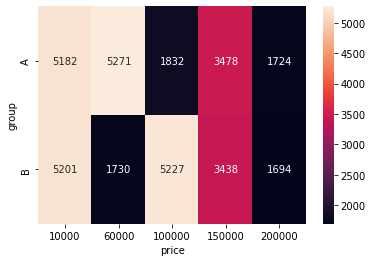

In [ ]:
# создадим сводную таблицу
pivot = updated_data[updated_data['price'] > 0].pivot_table(
    # берем цену больше 0
    values='purchase', # считаем количество продаж
    index='group', # в разбивке по группам
    columns='price', # + в разбивке по цене
    aggfunc='sum' # продажи суммируем
)

import seaborn as sns # импорт библиотеки

heatmap = sns.heatmap(pivot, annot=True, fmt='.0f') # построение графика


Вывод: Туры за 60000 рублей приобрели в группе А 5271 покупатель, в группе В - 1730 покупателей.
Бросается в глаза разница покупательской способности для туров за 60тыс. и 100тыс. руб. В группе А гораздо чаще покупали туры за 60тыс.руб., а в группе В - за 100тыс.руб.

## Задание 7.8
Настало время поговорить о стабилизации кумулятивных метрик во времени. Но прежде чем перейти к кумулятивным метрикам, необходимо построить таблицу с ежедневными данными результатов проведения A/B-тестирования.

Сгруппируйте данные по дате и группе тестирования. В каждой группе вычислите количество посещений страницы, количество покупок и сумму покупок.

Добавьте в таблицу информацию о ежедневной конверсии (ежедневное количество покупок / ежедневное количество посещений) в группе и ежедневном среднем чеке (ежедневная сумма покупок / ежедневное количество покупок).

Чему равна конверсия 3 января 2021 года? Ответ приведите в процентах и округлите до сотых.

Чему равен средний чек 3 января 2021 года? Ответ приведите в рублях и округлите до целого.

In [ ]:
# сгруппируем данные по дате и группе, применим агрегирующие функции для формирования новых столбцов
daily_data = updated_data.groupby(['date', 'group']).agg({
    'user_id':'count',
    'purchase':'sum',
    'price': 'sum'
}).reset_index().rename(columns={ # переименуем новые столбцы
    'user_id': 'count_visits',
    'purchase': 'count_purchases',
    'price': 'sum_price'
})
# конверсия - отношение совершенных покупок к посещениям в %
daily_data['conversion'] = daily_data['count_purchases']/daily_data['count_visits'] * 100
# средний чек - отношение суммы покупок к количеству покупок
daily_data['mean_check'] = daily_data['sum_price']/daily_data['count_purchases']

print('Конверсия 3 января 2021 года:') # выведем конверсию на 03.01.2021
display(daily_data[daily_data['date'] == pd.to_datetime('2021-01-03')][['group', 'conversion']].round(2))
 
print('Средний чек 3 января 2021 года:') # выведем средний чек на 03.01.2021
display(daily_data[daily_data['date'] == pd.to_datetime('2021-01-03')][['group', 'mean_check']].round())


Конверсия 3 января 2021 года:


,group,conversion
2,A,11.34
3,B,11.39


Средний чек 3 января 2021 года:


,group,mean_check
2,A,82888.0
3,B,87480.0


Вывод: 3 января 2021 года конверсия в группе А составила 11.34 %, в группе В - 11.39 %. Средний чек в этот день в группе А составил 82888 руб., в группе В - 87480 руб.

## Задание 7.9
Добавьте в таблицу с ежедневными показателями кумулятивные признаки:

кумулятивное количество посещений страницы;
кумулятивное количество покупок;
кумулятивную сумму покупок.
Не забудьте при расчёте кумулятивной суммы сгруппировать данные по группам.

Вычислите кумулятивную конверсию и кумулятивный средний чек на основе полученных кумулятивных показателей.

Какая кумулятивная конверсия была в группе B на 20 января 2021 года? Ответ приведите в процентах, округлив до сотых.

Какой кумулятивный средний чек был в группе А на 12 января 2021 года? Ответ приведите в рублях, округлив до целых.

Постройте кумулятивные графики конверсии и среднего чека в каждой группе по дням. Сделайте выводы. Можно ли назвать A/B-тест завершённым — стабилизировались ли значения метрик во времени? Как соотносятся кумулятивные показатели в каждой группе?

Кумулятивная конверсия 20 января 2021 года:


,group,cum_conversion
36,A,11.98
37,B,11.90


Кумулятивный средний чек 12 января 2021 года:


,group,cum_mean_check
20,A,81492.0
21,B,88352.0


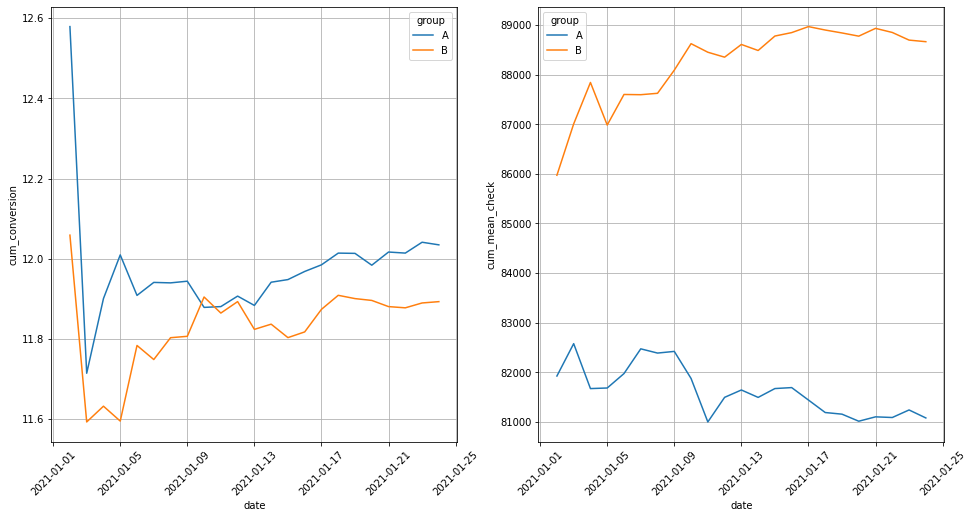

In [ ]:
# применим функцию cumsum() для формирования кумулятивного количества посещений
daily_data['cum_count_visits'] = daily_data.groupby('group')['count_visits'].cumsum()
# кумулятивного количества покупок
daily_data['cum_count_purchases'] = daily_data.groupby('group')['count_purchases'].cumsum()
# и кумулятивной суммы покупок
daily_data['cum_sum_price'] = daily_data.groupby('group')['sum_price'].cumsum()

# кумулятивная конверсия - отношение кумулятивного количества покупок к кумулятивному количеству посещений
daily_data['cum_conversion'] = daily_data['cum_count_purchases'] / daily_data['cum_count_visits'] * 100
# кумулятивный средний чек - отношение кумулятивной суммы покупок к кумулятивному количеству покупок
daily_data['cum_mean_check'] = daily_data['cum_sum_price'] / daily_data['cum_count_purchases']

# выведем значение кумулятивной конверсии на 20.01.2021
print('Кумулятивная конверсия 20 января 2021 года:')
display(daily_data[daily_data['date'] == pd.to_datetime('2021-01-20')][['group', 'cum_conversion']].round(2))
 
# выведем значение кумулятивного среднего чека на 12.01.2021
print('Кумулятивный средний чек 12 января 2021 года:')
display(daily_data[daily_data['date'] == pd.to_datetime('2021-01-12')][['group', 'cum_mean_check']].round())

import matplotlib.pyplot as plt # импорт библиотеки для построения графиков

# создадим фигуру для 2х систем координат
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
# строим график для кумулятивной конверсии
sns.lineplot(x='date', y='cum_conversion', data=daily_data, hue='group', ax=axes[0])
# строим график для кумулятиного среднего чека
sns.lineplot(x='date', y='cum_mean_check', data=daily_data, hue='group', ax=axes[1])
# добавим названия графиков
axes[0].set_title = 'Кумулятивная конверсия в группах по дням'
axes[1].set_title = 'Кумулятивный средний чек в группах по дням'
# повернем метки на оси абсцисс
axes[0].xaxis.set_tick_params(rotation = 45)
axes[1].xaxis.set_tick_params(rotation = 45)
# добавим сетку
axes[0].grid(True)
axes[1].grid(True)


Вывод: Кумулятивная конверсия 20 января 2021 года в группе В составила 11.9 %. Кумулятивный средний чек 12 января 2021 года в группе А составил 81492 руб.

График кумулятивной конверсии стабилизировался после 6 января, а кумулятивного среднего чека - после 12 января. На основании этого можно утверждать, что временной интервал для проведения А/В-теста был достаточным, данные готовы к анализу.
Кумулятивная конверсия в группе А стабильно немного выше, чем в группе В, причем в первый день проведения теста наблюдается резкий сильный спад в обеих группах.
Кумулятивный средний чек в группе В на протяжении всего теста намного выше, чем в группе А, причем со временем наблюдаемся хоть и небольшая, но тенденция роста, а вот в группе А на протяжении всего эксперимента наблюдалась тенденция к уменьшению кумулятивной метрики этого параметра.

## Задание 7.10
Настало время переходить к проверке статистической значимости разницы между метриками в группах. Начнём с конверсии.

Какой тест вы примените для проверки гипотезы о равенстве конверсий в группах?
1. T-тест
2. Z-тест
3. Тест Манна-Уитни
4. Тест Шапиро-Уилка

Проведите тестирование при следующих нулевой и альтернативной гипотезе:

H0: Конверсии в группах А и B равны;
H1: Конверсия в группе А больше, чем конверсия в группе B.

Вычислите p-value вашего теста для конверсий в группах А и B. Сравните полученное значение p-value с уровнем значимости alhpa=0.05.

 Приведите свои выводы по результатам проведённого статистического теста. Есть ли статистическая разница между конверсиями в группах А и B?

In [ ]:
# рассчитаем количество успехов и общее количество наблюдений для каждой группы
converted = updated_data.groupby('group')['purchase'].agg([
    'sum', 'count'
])
display(converted) # вывод полученного датасета
# формулируем нулевую и альтернативную гипотезы
H0 = 'Конверсия в группе А равна конверсии в группе В'
H1 = 'Конверсия в группе А больше, чем в группе В' # правосторонняя
alpha = 0.05 # уровень значимости

# используем z-тест для пропорций для вычисления p-value
from statsmodels.stats.proportion import proportions_ztest

_, p_value = proportions_ztest(
    count=converted['sum'], # количество успехов
    nobs=converted['count'], # общее количество наблюдений
    alternative='larger' # альтернативная гипотеза - правосторонняя
)
print('p-value:', round(p_value, 2)) # вывод p-value

if (p_value < alpha): # сравним p-value с alpha
  print(f'Отвергаем нулевую гипотезу. {H1}.')
else:
  print(f'Принимаем нулевую гипотезу. {H0}')

,sum,count
group,,
A,17487,145307
B,17290,145381


p-value: 0.12
Принимаем нулевую гипотезу. Конверсия в группе А равна конверсии в группе В


Выводы:

Сам по себе признак конверсии - это отношение, пропорция, имеющая только 2 возможных исхода (распределение Бернулли), поэтому для проверки статистической значимости изменения этого признака используем z-критерий для пропорций.

При уровне значимости alpha=0.05 p-value=0.12. Как видим, p-value > alpha, что означает верность нулевой гипотезы о том, что конверсии в группах А и В статистически равны. 

Разницы между вариантами А и В по метрике конверсии нет.

## Задание 7.11
Убедитесь в своих рассуждениях, построив 95%-ый доверительный интервал для конверсий и разницы между ними. Используйте z_crit в своих расчётах.

Укажите нижнюю и верхнюю границы доверительных интервалов. Все границы приведите в процентах и округлите до второго знака после запятой. Например, нижняя граница — 89.24, верхняя граница — 91.25.

Проинтерпретируйте построенные доверительные интервалы для конверсий в группах. Есть ли перекрытие между доверительными интервалами для групп? Есть ли статистическая разница между конверсиями в группах А и B?

In [ ]:
from scipy.stats import norm # импорт функций

# функция для расчета доверительного интервала конверсии
def conversion_conf_interval(n, x_p, gamma=0.95):
  alpha = 1 - gamma # уровень значимости
  z_crit = -norm.ppf(alpha/2) # z-критическое
  eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 # погрешность
  lower_bound = x_p - eps # левая (нижняя) граница
  upper_bound = x_p + eps # правая (верхняя) граница
  # возврат - кортеж границ в %, округленный до 2х знаков
  return (round(lower_bound * 100, 2)), round(upper_bound * 100, 2)
  
# разделим данные по группам
a_data = updated_data[updated_data['group'] == 'A']
b_data = updated_data[updated_data['group'] == 'B']

# применим функцию к данным группы А
conf_interval_a = conversion_conf_interval(
a_data['user_id'].count(), # размер выборки
a_data['purchase'].mean() # выборочная пропорция
)
# выведем результат для группы А
print(f'Доверительный интервал конверсии в группе А: {conf_interval_a}')

# применим функцию к данным группы В
conf_interval_b = conversion_conf_interval(
b_data['user_id'].count(), # размер выборки
b_data['purchase'].mean() # выборочная пропорция
)
# выведем результат для группы В
print(f'Доверительный интервал конверсии в группе В: {conf_interval_b}')

# функция для доверительного интервала разности конверсий
def diff_conversion_conf_interval(n, xp, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = xp[1] - xp[0] # выборочная разница конверсий
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (xp[0] * (1 - xp[0])/n[0] + xp[1] * (1 - xp[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возврат - кортеж границ в %, округленный до 2х знаков
    return round(lower_bound *100, 2), round(upper_bound * 100, 2)

# рассчитаем данные, необходимые для ввода в функцию
# размеры выборок групп
n = [a_data['user_id'].count(), b_data['user_id'].count()]
# выборочная пропорция групп
xp = [a_data['purchase'].mean(), b_data['purchase'].mean()]

# применим функцию
diff_inverval = diff_conversion_conf_interval(n, xp)

# выведем результат
print(f'Доверительный интервал разности конверсий: {diff_inverval}')

Доверительный интервал конверсии в группе А: (11.87, 12.2)
Доверительный интервал конверсии в группе В: (11.73, 12.06)
Доверительный интервал разности конверсий: (-0.38, 0.09)


Выводы:
Доверительный интервал для конверсии в группе А лежит полностью в доверительном интервале группы В, поэтому можно с уверенностью сказать, что доверительный интервал конверсии не изменился, а лишь немного расширился.

Доверительный интервал разности конверсий для групп А и В охватывает точку 0 (левая граница меньше 0, правая граница больше 0). Такое распределение говорит о том, что разницы в конверсиях нет и варианты А и В равнозначны по метрике конверсии.

## Задание 7.12
Ранее мы построили таблицу с ежедневными показателями. Теперь она нам снова понадобится, так как нас интересует ежедневный средний чек.

Проверьте гипотезу о нормальности распределения ежедневного среднего чека в каждой из групп тестирования.

Какой тест вы примените для проверки гипотезы о нормальности распределения ежедневного среднего чека?
1. T-тест
2. Z-тест
3. Тест Манна-Уитни
4. Тест Шапиро-Уилка
5. нет ответа

Как будут звучать нулевая и альтернативная гипотезы для каждого из тестов?
1. H0: Распределение нормальное; H1: Распределение отлично от нормального
2. H0: Распределение отлично от нормального; H1: Распределение нормальное
3. нет ответа

Каковы результаты статистического теста при уровне значимости alpha=0.05?
1. Распределение ежедневного среднего чека в группе А нормальное, а в группе B — нет
2. Распределение ежедневного среднего чека в группе B нормальное, а в группе А — нет
3. Распределение ежедневного среднего чека нормальное в обеих группах
4. Распределение ежедневного среднего чека отлично от нормального в обеих группах

In [ ]:
# сформулируем нулевую и альтернативную гипотезы
H0 = 'Распределение нормальное.'
H1 = 'Распределение отлично от нормального.'
alpha = 0.05 # уровень значимости

# разделим данные по группам
aa_data = daily_data[daily_data['group'] == 'A']
bb_data = daily_data[daily_data['group'] == 'B']

from scipy.stats import shapiro # импорт функции

# применение функции для группы A
_, p = shapiro(aa_data['mean_check'])
print('Для группы А', 'p=%.3f'%p) # выведем результирующее значение p-value

if p > alpha: # сравним p-value с alpha
  print(f'Для группы А принимаем нулевую гипотезу. {H0}')
else:
  print(f'Для группы А отвергаем нулевую гипотезу. {H1}')
print()

# применение функции для группы B
_, p = shapiro(bb_data['mean_check'])
print('Для группы B', 'p=%.3f'%p) # выведем результирующее значение p-value

if p > alpha: # сравним p-value с alpha
  print(f'Для группы B принимаем нулевую гипотезу. {H0}')
else:
  print(f'Для группы B отвергаем нулевую гипотезу. {H1}')

Для группы А p=0.253
Для группы А принимаем нулевую гипотезу. Распределение нормальное.

Для группы B p=0.094
Для группы B принимаем нулевую гипотезу. Распределение нормальное.


Выводы:
Распределение такого признака, как средний чек, обычно напоминает нормальное (распределение Гаусса), поэтому проверим это утверждение с помощью теста Шапиро-Уилка.

В тестах на нормальность распределения нулевая гипотеза всегда утверждает, что распределение нормально, а альтернативная гипотеза - что распределение отлично от нормального.

При уровне значимости alpha = 0.05 тест показал, что p-value=0.253 для группы А и 0.094 для группы Б. В обоих случаях p-value больше уровня значимости, а это означает, что мы не можем отклонить нулевую гипотезу, распределение в обеих группах нормальное.

## Задание 7.13
Настало время сравнить варианты дизайна страницы по метрике среднего чека.

Какой тест вы примените для проверки гипотезы о равенстве средних чеков по дням в группах?
1. T-тест
2. Z-тест
3. Тест Манна-Уитни
4. Тест Шапиро-Уилка
5. нет ответа

Проведите тестирование при следующих нулевой и альтернативной гипотезе:

H0: Ежедневные средние чеки в группах А и B равны;
H1: Ежедневный средний чек в группе А меньше, чем в группе B.

Вычислите  вашего теста для ежедневного среднего чека в группах А и B. Сравните полученное значение  с уровнем значимости alpha=0.05.
1. полученное p-value < alpha
2. полученное p-value > alpha
3. нет ответа

✍️ Приведите свои выводы по результатам проведённого статистического теста. Есть ли статистическая разница между ежедневными средними чеками в группах А и B?

In [ ]:
from scipy.stats import ttest_ind # импорт функции

# сформулируем нулевую и альтернативную гипотезы
H0 = 'Ежедневные средние чеки в группах А и B равны.'
H1 = 'Ежедневный средний чек в группе А меньше, чем в группе B.' # левосторонняя
alpha = 0.05 # уровень значимости

# применение функции
test_result = ttest_ind(
    aa_data['mean_check'], 
    bb_data['mean_check'], 
    alternative='less'
)
# выведем результат
print('p-value =', test_result[1].round(3))

# сравним p-value с alpha
if test_result[1] > alpha:
  print(f'Нулевая гипотеза верна. {H0}')
else:
  print(f'Отвергаем нулевую гипотезу. {H1}')

p-value = 0.0
Отвергаем нулевую гипотезу. Ежедневный средний чек в группе А меньше, чем в группе B.


Выводы:
Мы выяснили, что данные в признаке среднего чека имеют нормальное распределение, зависимая переменная (средний чек) - количественная (представлена числом), мы сравниваем 2 группы (А и Б) и у нас выборка большого размера, соответственно, для проверки гипотезы о равенстве средних чеков по дням в группах следует применить Т-тест.

Полученное значение p-value меньше значения alpha, а это значит, что статистическая разница между ежедневными средними чеками в группах А и B есть, и альтернативная гипотеза о том, что ежедневный средний чек в группе А меньше, чем в группе B, верна.

## Задание 7.14
Постройте 95 %-ый доверительный интервал для среднего чека в каждой группе. Так как выборка ежедневных средних чеков небольшая, используйте t_crit в своих расчётах.

Укажите нижнюю и верхнюю границы доверительного интервала для истинного среднего чека каждой из групп. Ответ округлите до целого. Например, нижняя граница — 90324, верхняя граница — 241124.

✍️ Проинтерпретируйте построенные доверительные интервалы для ежедневных средних чеков в группах. Есть ли между ними пересечения? О чём это говорит?

In [ ]:
from scipy.stats import t # импорт функции

# разделим данные по группам
a_daily_data = daily_data[daily_data['group'] == 'A']
b_daily_data = daily_data[daily_data['group'] == 'B']

# данные для применения функции в группе А
n = a_daily_data['count_visits'].count() # размер выборки
k = n - 1 # число степеней свободы
x_mean = a_daily_data['mean_check'].mean() # выборочное среднее
x_std = a_daily_data['mean_check'].std() # выборочное стандартное отклонение
gamma = 0.95 # уровень надежности
alpha = 1 - gamma # уровень значимости

t_crit = -t.ppf(alpha/2, k) # t-критическое

eps = t_crit * x_std / (n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
a_interval = (round(lower_bound), round(upper_bound))

print('Доверительный интервал для среднего чека в группе А:', a_interval)

# данные для применения функции в группе B
n1 = b_daily_data['count_visits'].count() # размер выборки
k1 = n1 - 1 # число степеней свободы
x_mean1 = b_daily_data['mean_check'].mean() # выборочное среднее
x_std1 = b_daily_data['mean_check'].std() # выборочное стандартное отклонение

t_crit1 = -t.ppf(alpha/2, k1) # t-критическое

eps1 = t_crit1 * x_std1 / (n1 ** 0.5) # погрешность
lower_bound1 = x_mean1 - eps1 # левая (нижняя) граница
upper_bound1 = x_mean1 + eps1 # правая (верхняя) граница
b_interval = (round(lower_bound1), round(upper_bound1))

print('Доверительный интервал для среднего чека в группе B:', b_interval)


Доверительный интервал для среднего чека в группе А: (79630, 82308)
Доверительный интервал для среднего чека в группе B: (87626, 89526)


Выводы:
Доверительные интервалы для ежедневных средних чеков в группах не пересекаются, что говорит о статистической значимости разницы между ежедневными средними чеками в группах. При этом доверительный интервал для группы Б лежит значительно правее на числовой прямой, а это говорит о том, что истинное среднее ежедневного чека в генеральной совокупности будет больше при использовании варианта Б, чем при использовании варианта А.

-----

# Общий вывод по результатам A/B-теста.

По метрике конверсии вариант А незначительно эффективнее.

По метрике среднего чека вариант В значительно эффективнее варианта В. 

Получается, при использовании нового дизайна посадочной страницы конверсия незначительно упала, но при этом значительно вырос средний чек. 

По результатам комплексного анализа по метрикам конверсии и среднего чека становится очевидным, что вариант посадочной страницы В (с обновленным дизайном) более эффективен.

Ссылка на ноутбук:
https://colab.research.google.com/drive/1RVFa4Lp5TJOOznaboDionr890YRyVgge#scrollTo=1uem8Gxpjezt